##### Notebook description:

This is a simple notebook to plot the DTU18 MSS file downloaded from https://ftp.space.dtu.dk/ as a map of the Arctic Ocean. 


Link to files: 

https://ftp.space.dtu.dk/pub/DTU18/1_MIN/DTU18MSS_1min.nc

https://ftp.space.dtu.dk/pub/DTU21/1_MIN/DTU21MSS_1min.mss.nc


The map is designed to follow the style of the maps in Figure 1 of Skourup et al. (2017).

### Set-Up

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
from matplotlib import colors
import pygmt
import xarray as xr

### Read in DTU18

Information from the DTU18 website: 

"The files contain the following information on each line corresponding to each cell in the 1 minute
resolution mesh expanded by the latitude range and longitude range
The grid is written out as points from Northwest to southeast in a scanning file format where the
upper row is shown first.

Example: 4 59.9500 15.6500 43.8390 64.1221

Where each line contain:
Running index (line number).
Latitude (decimal degree),
Longitude (decimal degree),
The MSS in geodetic coordinates (meters). Given relative to WGS84/GRS80 ellipsoid

Depth (meters) – GEBCO Bathymetry. Depth is positive. Zero/negative on land."

(https://ftp.space.dtu.dk/pub/Altimetry/FAMOS/DTU18MSS(10B)/MSS_DTU18.pdf)

In [54]:
#Open the downloaded file using xarray
df_dtu18_all = xr.open_dataset("DTU18MSS_1min.nc")

In [55]:
#Narrow down the file to Arctic Ocean so it's smaller in size! 
df_dtu18 = df_dtu18_all.where(df_dtu18_all.lat>65,drop=True)


### Read in DTU21

In [56]:
#Reading in DTU21
df_dtu21_all = xr.open_dataset("DTU21MSS_1min.mss.nc")

In [57]:
#Narrow down the file to Arctic Ocean so it's smaller in size! 
df_dtu21 = df_dtu21_all.where(df_dtu21_all.lat>65,drop=True)

### Plot DTU18

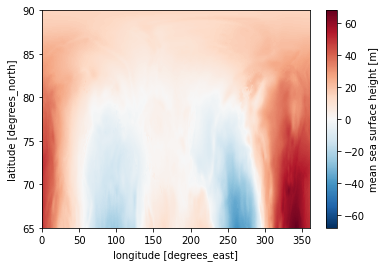

In [58]:
#Simple test plot to see what it looks like
df_dtu18.mss.plot()

### Plot DTU18 as a Map 

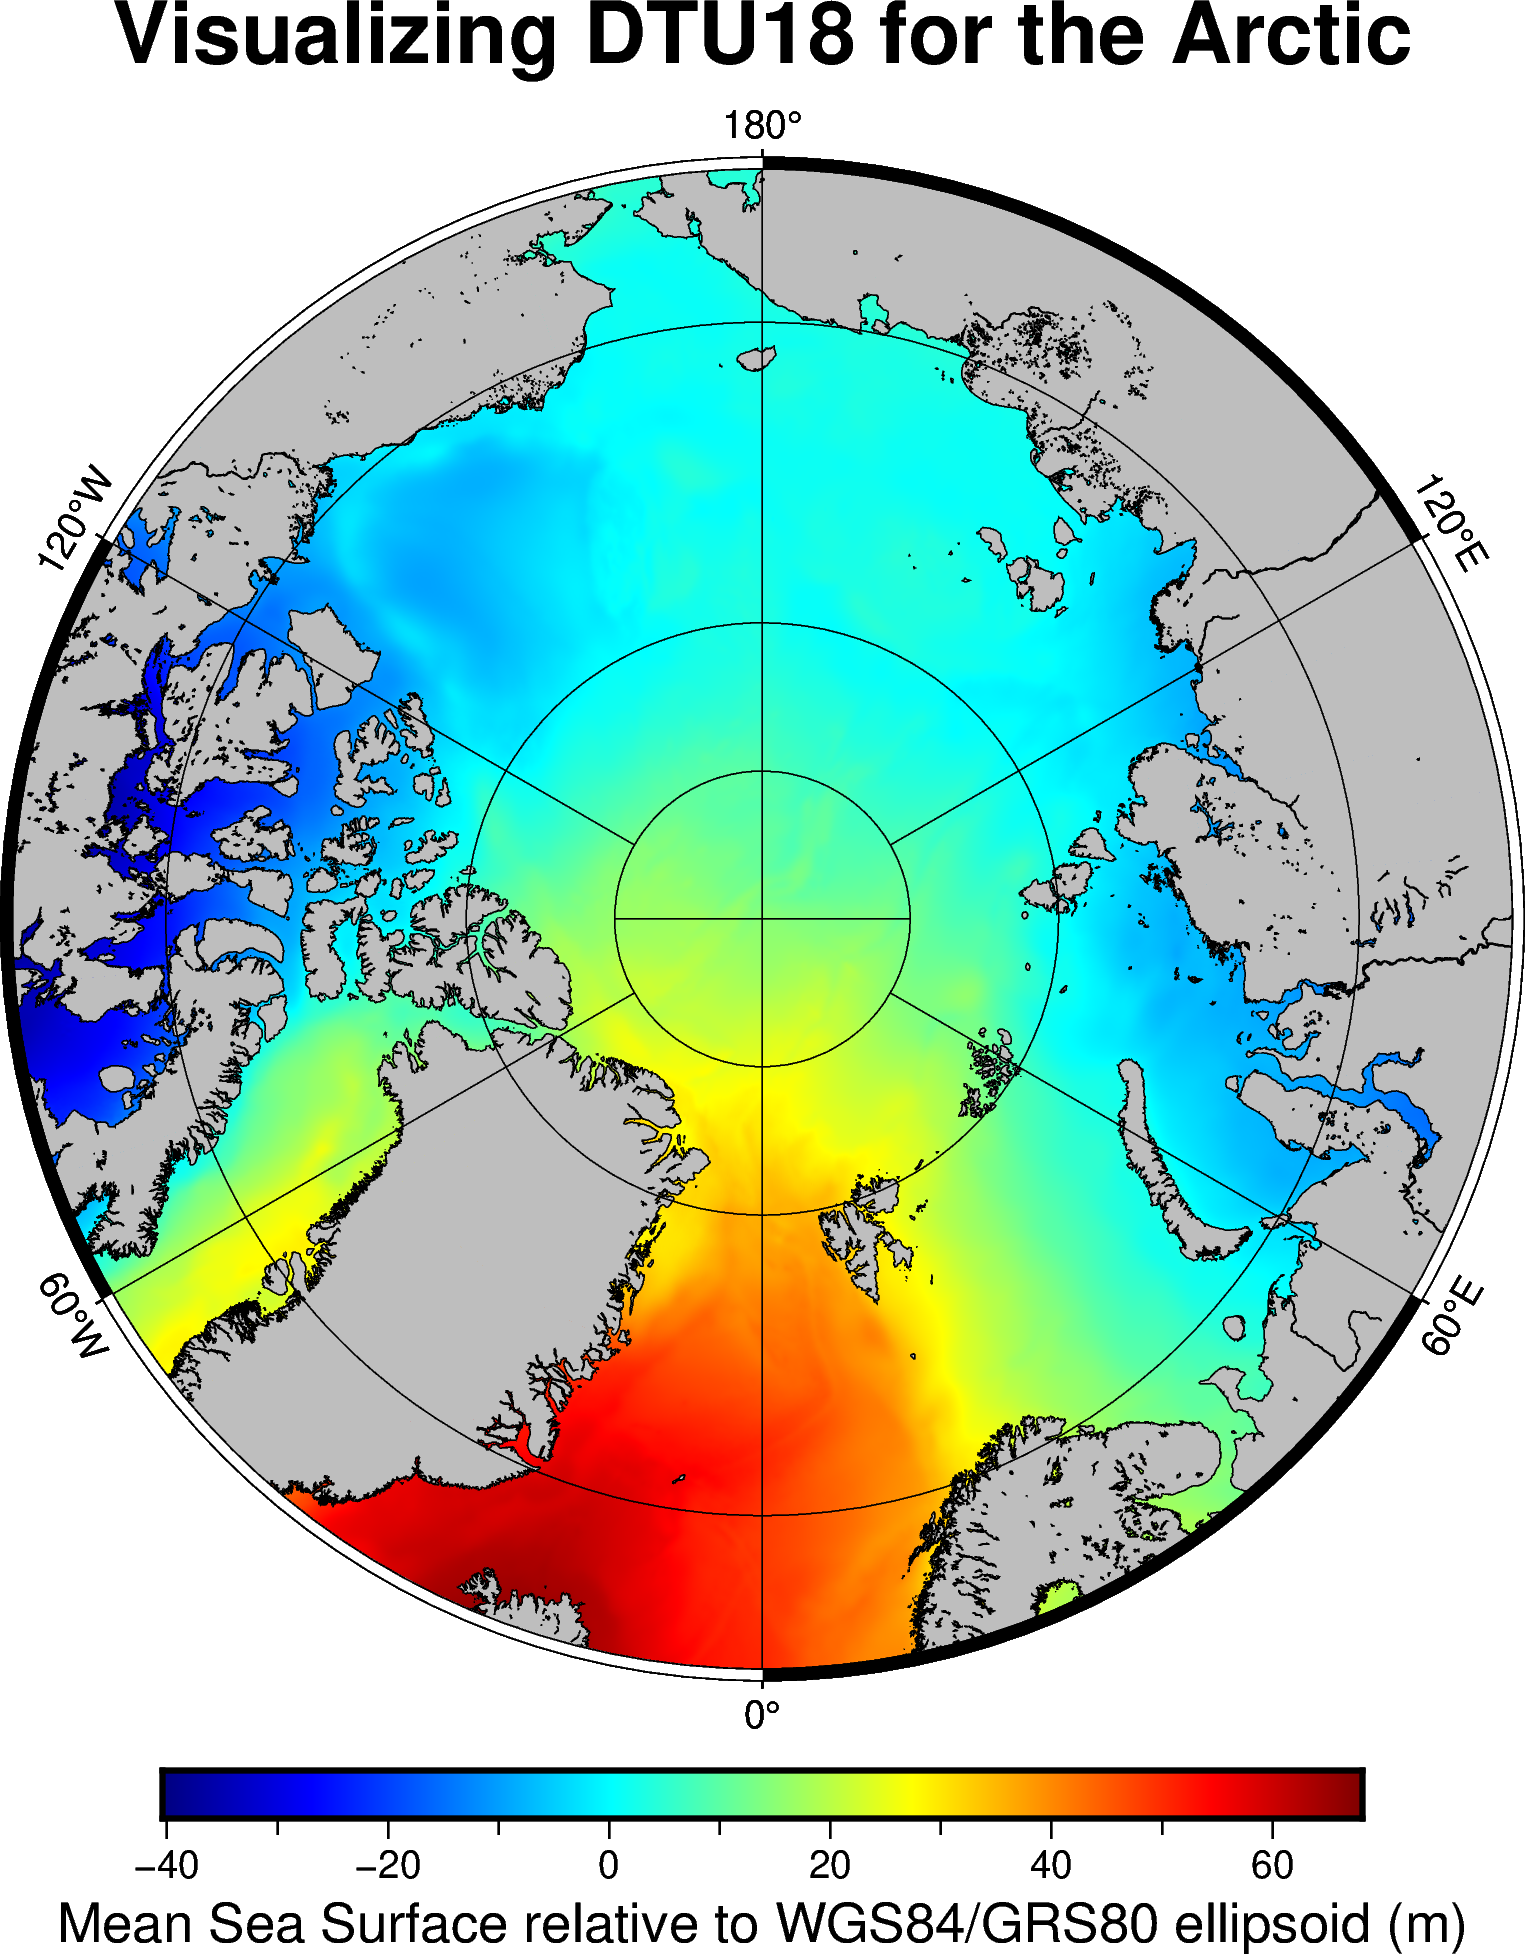

In [59]:
#Use pygmt to make a map visualizing DTU18 of the Arctic Ocean 

fig = pygmt.Figure()
fig.basemap(region=[0, 360, 65, 90], projection="S0/90.0/5i", frame=["a",'+t"Visualizing DTU18 for the Arctic"'])

#Plotting the DTU18 and desired color map
fig.grdimage(grid=df_dtu18.mss,projection="S0/90.0/5i", cmap="jet" )
#fig.grdimage(grid=df_sel.mss,projection="S0/90.0/5i", cmap="gebco" )


#Plotting shorelines, land, and grid lines:
fig.coast(shorelines=True,land="grey", frame=["ag"])

#Adding in a color bar
fig.colorbar(frame='af+l"Mean Sea Surface relative to WGS84/GRS80 ellipsoid (m)"')

fig.show()


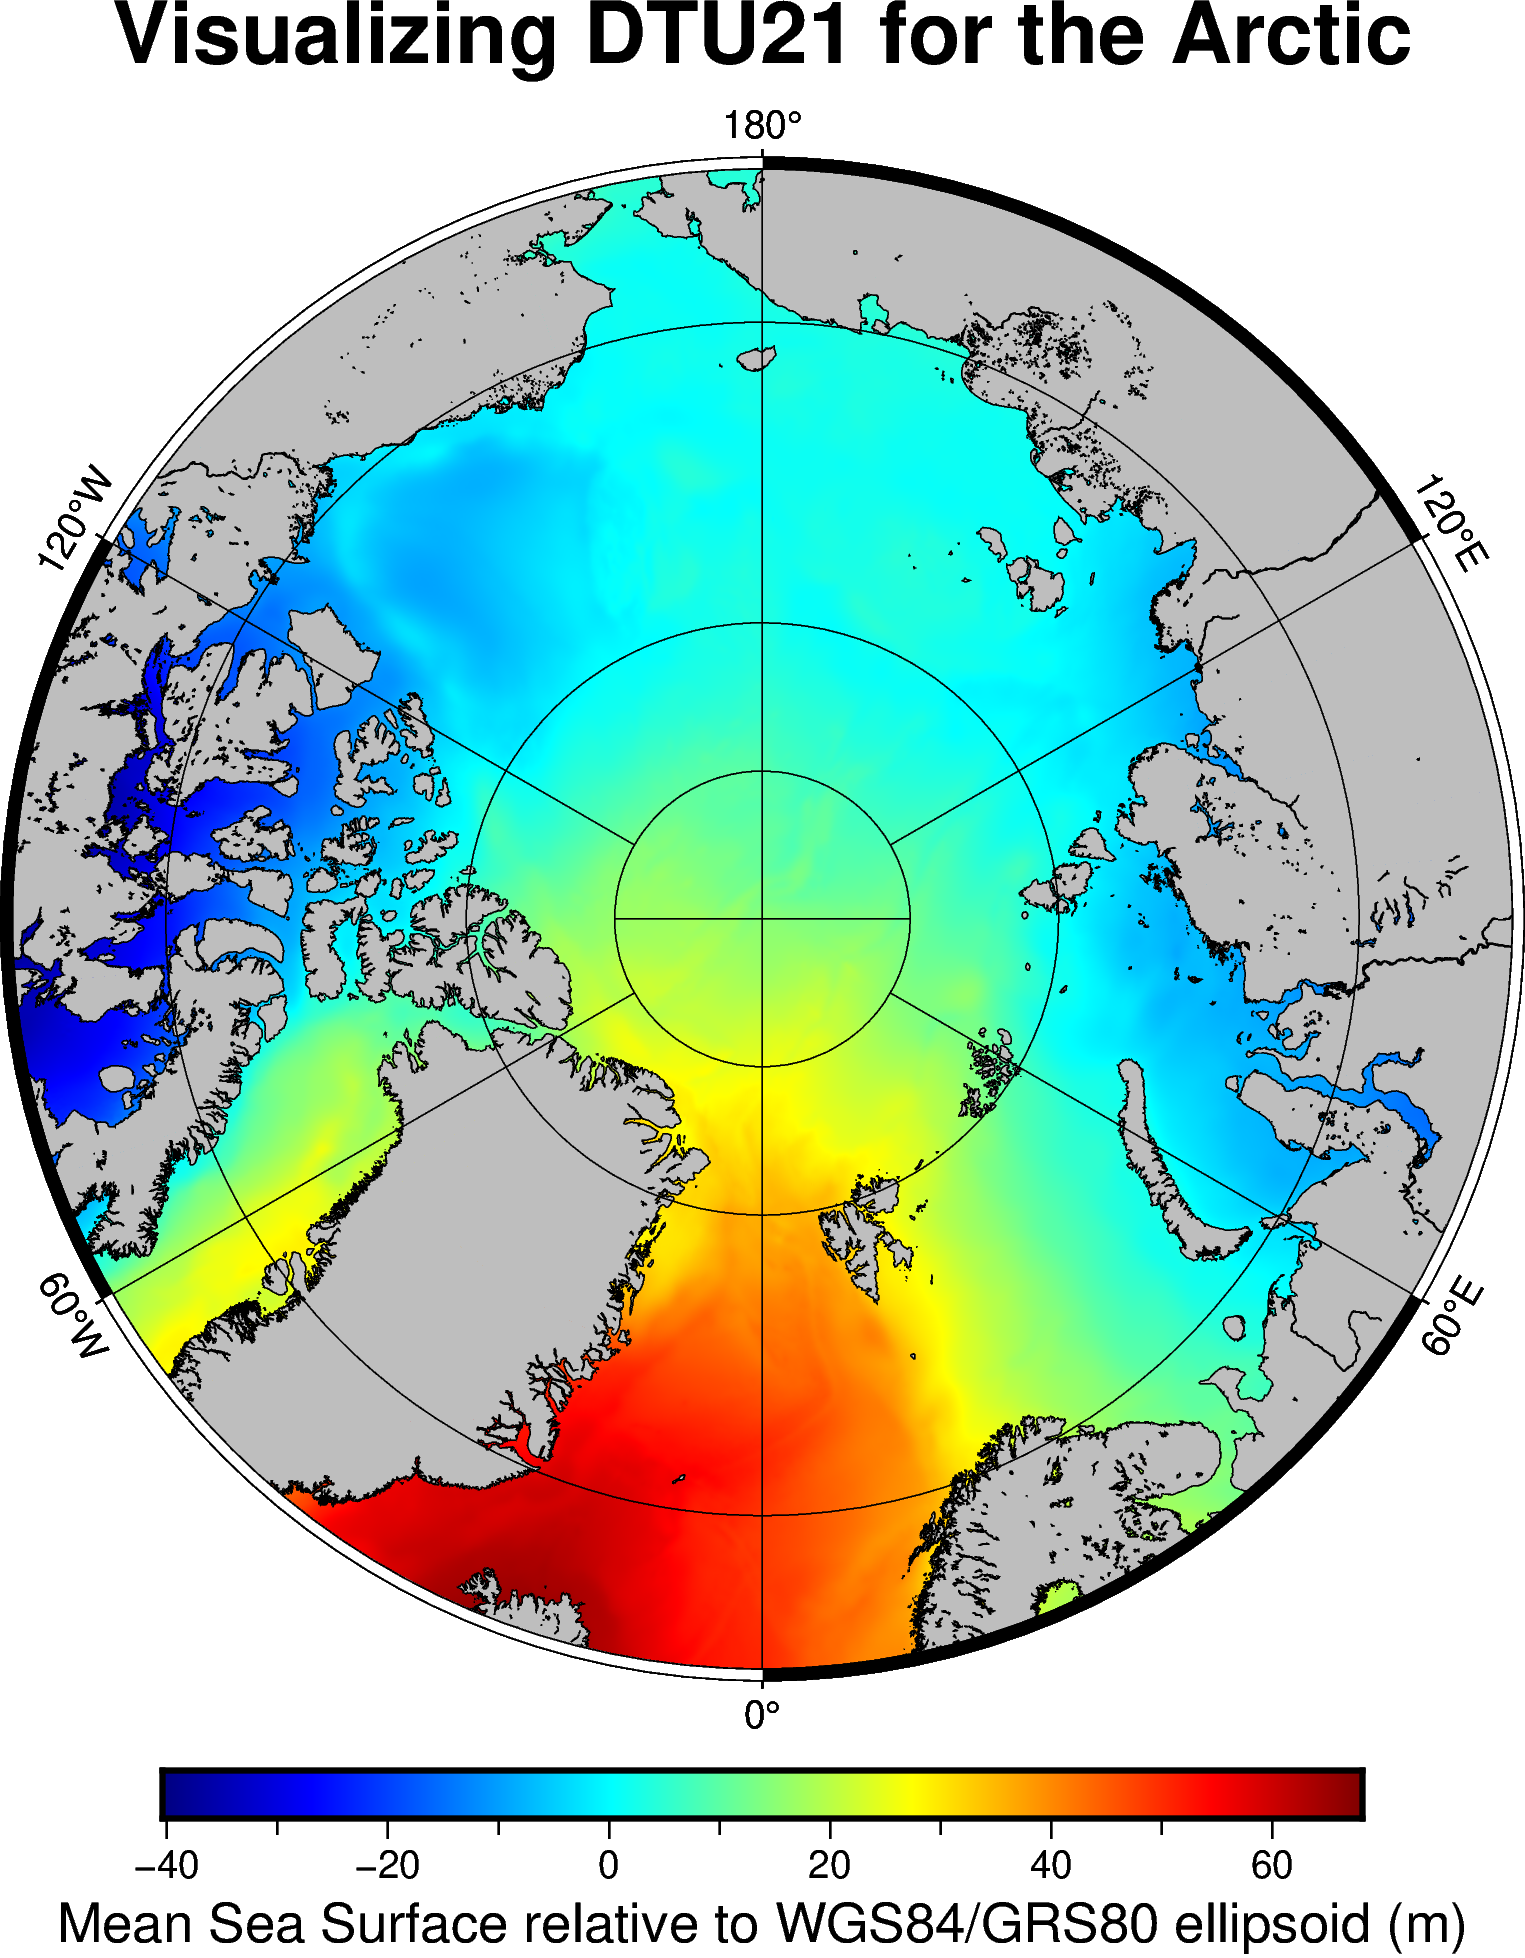

In [66]:
#Use pygmt to make a map visualizing DTU21 of the Arctic Ocean 

fig = pygmt.Figure()
fig.basemap(region=[0, 360, 65, 90], projection="S0/90.0/5i", frame=["a",'+t"Visualizing DTU21 for the Arctic"'])

#Plotting the DTU21 and desired color map
fig.grdimage(grid=df_dtu21.mss,projection="S0/90.0/5i", cmap="jet" )
#fig.grdimage(grid=df_sel.mss,projection="S0/90.0/5i", cmap="gebco" )


#Plotting shorelines, land, and grid lines:
fig.coast(shorelines=True,land="grey", frame=["ag"])

#Adding in a color bar
fig.colorbar(frame='af+l"Mean Sea Surface relative to WGS84/GRS80 ellipsoid (m)"')

fig.show()


### Exporting Figure

In [51]:
# Save as a figure
fig.savefig("DTU18_jet_map.png")

### Differencing DTU18 from DTU21

We are curious to see what the difference is between DTU18 and DTU21. To do this we will make a simple plot by differencing them.

In [61]:
#Difference the two dataframes
df_diff = df_dtu21 - df_dtu18

/Users/obaney/opt/anaconda3/envs/pygmt/lib/python3.9/site-packages/pygmt/clib/conversion.py:107: RuntimeWarning: Grid may have irregular spacing in the 'lon' dimension, but GMT only supports regular spacing. Calculated regular spacing 0.030335973931119725 is assumed in the 'lon' dimension.
  warnings.warn(msg, category=RuntimeWarning)
/Users/obaney/opt/anaconda3/envs/pygmt/lib/python3.9/site-packages/pygmt/clib/conversion.py:107: RuntimeWarning: Grid may have irregular spacing in the 'lat' dimension, but GMT only supports regular spacing. Calculated regular spacing 0.03126825198164371 is assumed in the 'lat' dimension.
  warnings.warn(msg, category=RuntimeWarning)


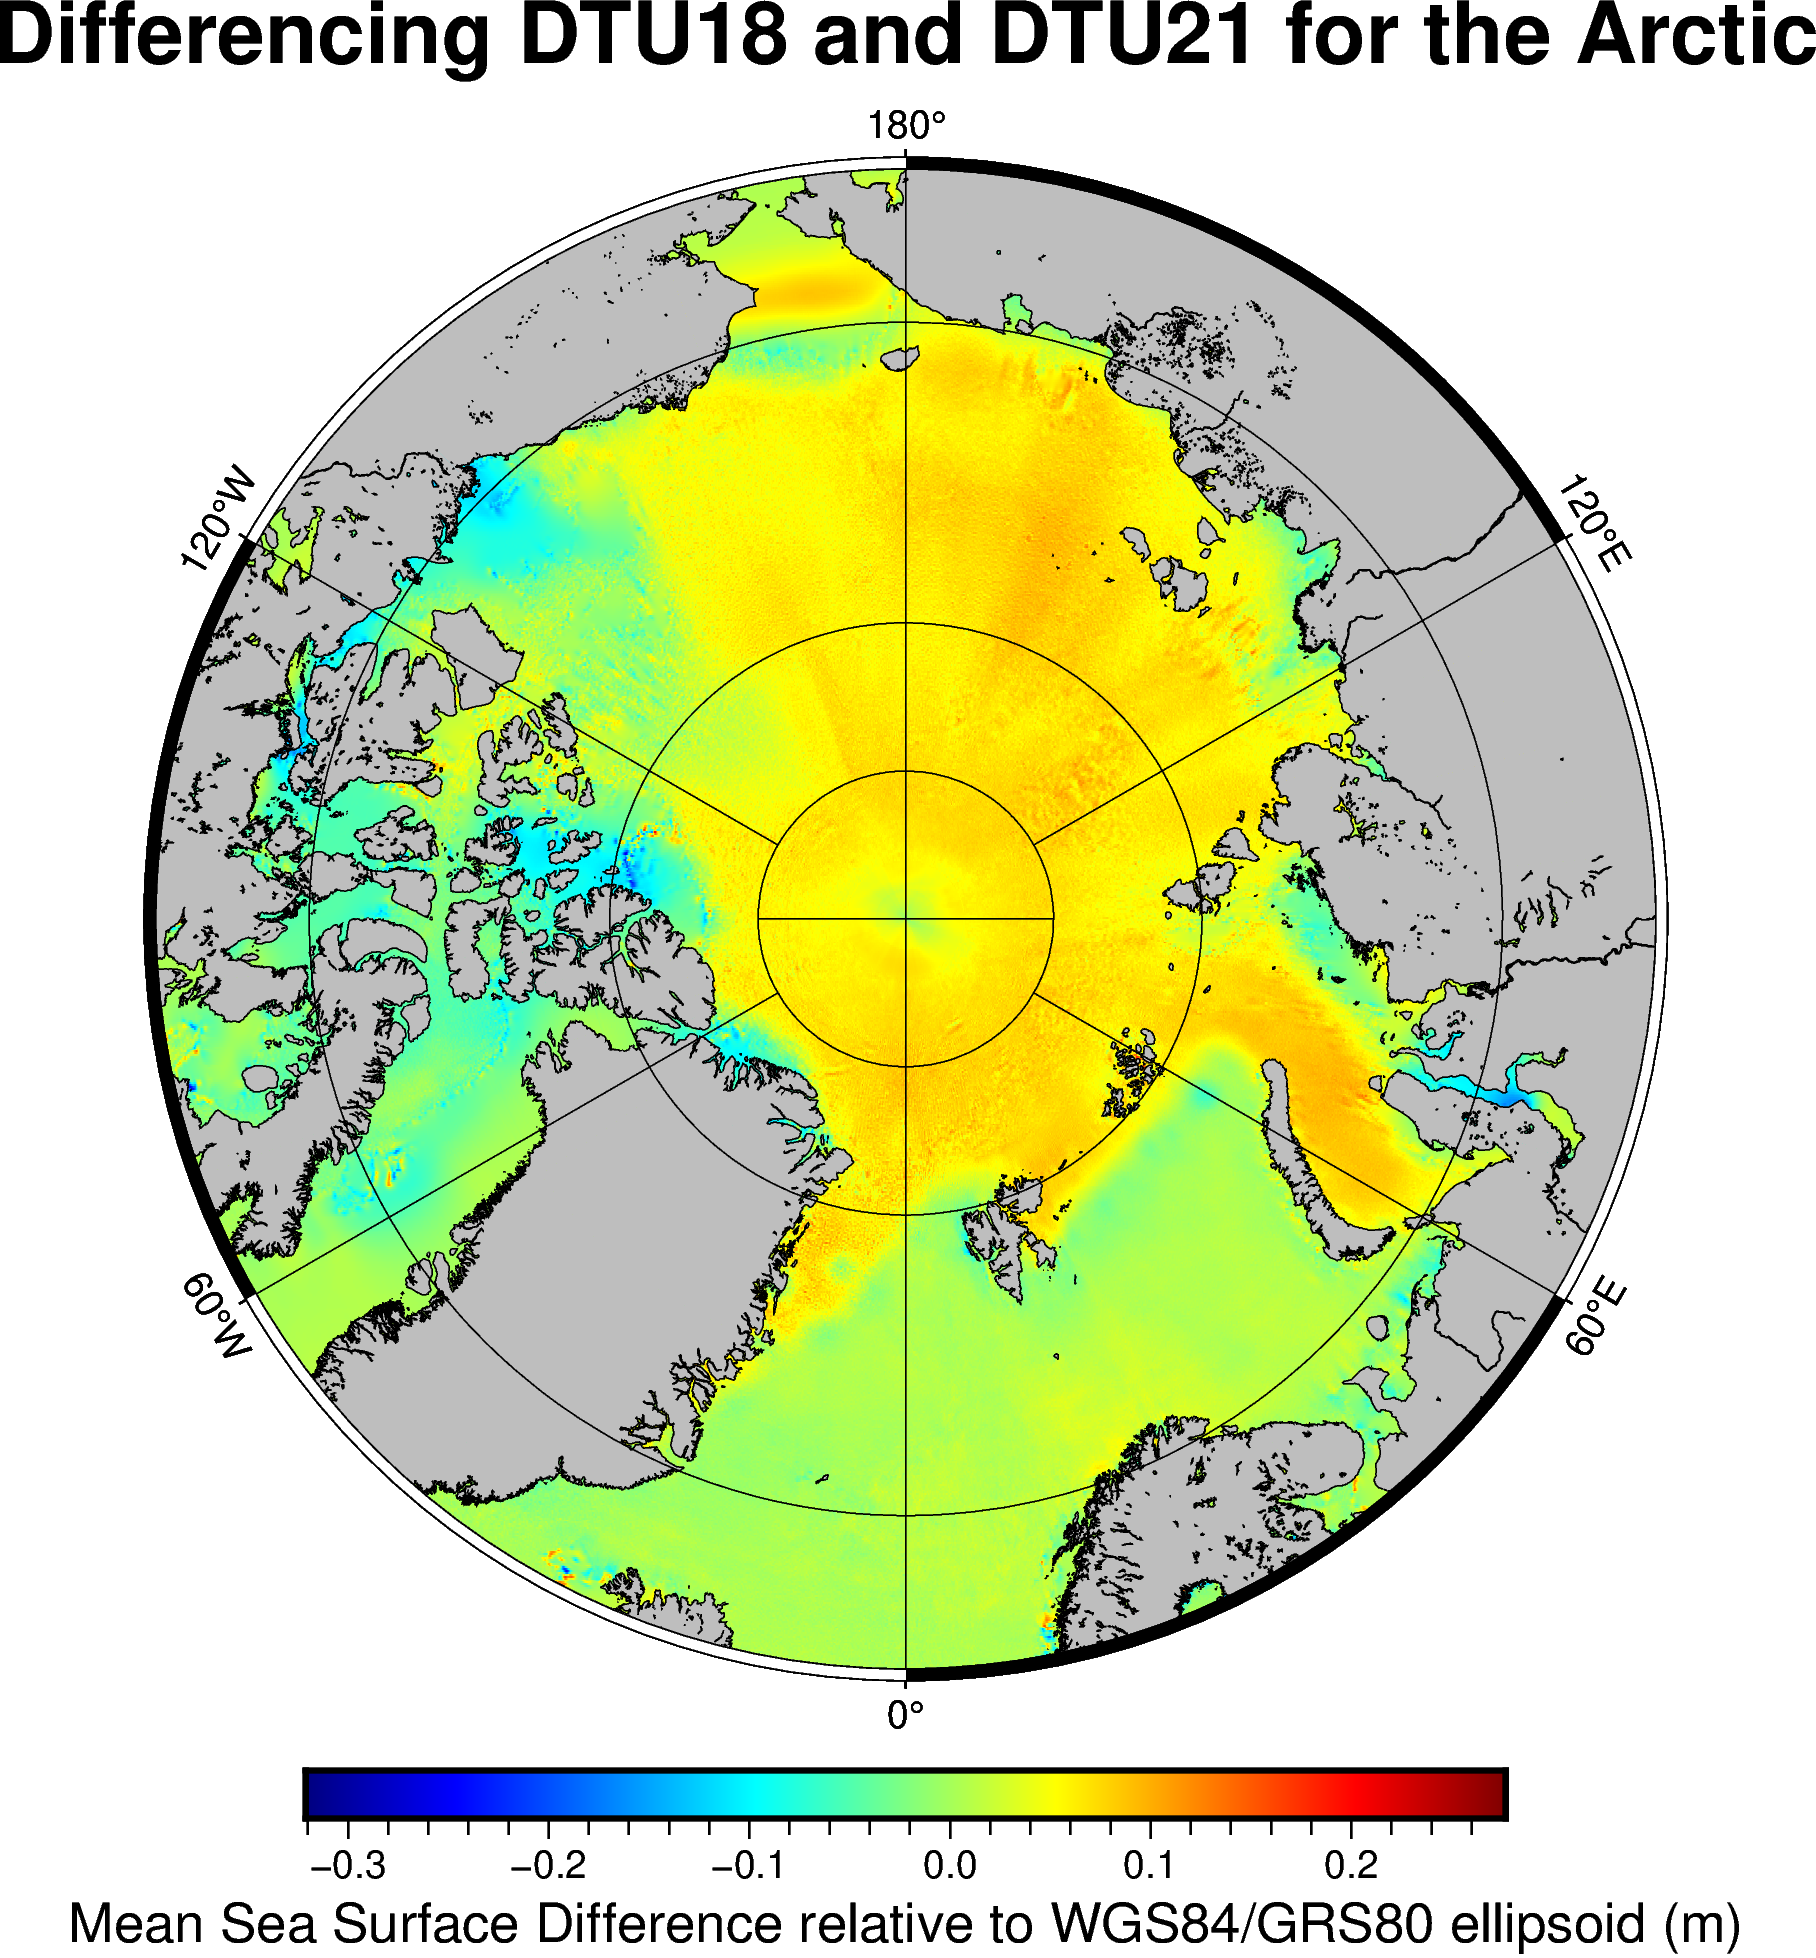

In [65]:
#Use pygmt to make a map visualizing DTU21 of the Arctic Ocean 
fig = pygmt.Figure()
fig.basemap(region=[0, 360, 65, 90], projection="S0/90.0/5i", frame=["a",'+t"Differencing DTU18 and DTU21 for the Arctic"'])

#Plotting the DTU21 and desired color map
fig.grdimage(grid=df_diff.mss,projection="S0/90.0/5i", cmap="jet" )

#Plotting shorelines, land, and grid lines:
fig.coast(shorelines=True,land="grey", frame=["ag"])

#Adding in a color bar
fig.colorbar(frame='af+l"Mean Sea Surface Difference relative to WGS84/GRS80 ellipsoid (m)"')

fig.show()


### References

Andersen, O., and Knudsen, P. (2009). J. Geophys. Res., 114, C11001. doi:10.1029/2008JC005179

Skourup, H., Farrell, S. L., Hendricks, S., Ricker, R., Armitage, T. W. K., Ridout, A., … Baker, S. (2017). An assessment of state-of-the-art mean sea surface and geoid models of the Arctic Ocean: Implications for sea ice freeboard retrieval. Journal of Geophysical Research: Oceans, 122, 8593– 8613. https://doi.org/10.1002/2017JC013176